# Исследование объявлений о продаже квартир

## Описание проекта

### Цель

Установить параметры, влияющие на рыночную стоимость объектов недвижимости, для дальнейшего использования полученных данных для построения автоматизированной системы, отслеживающей аномалии и мошеническую деятельность.

### Источник данных

Данные онлайн-сервиса с объявлениями о продаже недвижимости (архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет).

**Описание данных:**

`airport_nearest` - расстояние до ближайшего аэропорта в метрах (м);

`balcony` - число балконов;

`ceiling_height` - высота потолков (м);

`cityCenters_nearest` - расстояние до центра города (м);

`days_exposition` - сколько дней было размещено объявление (от публикации до снятия);

`first_day_exposition` - дата публикации;

`floor` - этаж;

`floors_total` - всего этажей в доме;

`is_apartment` - апартаменты (булев тип);

`kitchen_area` - площадь кухни в квадратных метрах (м²);

`last_price` - цена на момент снятия с публикации;

`living_area` - жилая площадь в квадратных метрах (м²);

`locality_name` - название населённого пункта;

`open_plan` - свободная планировка (булев тип);

`parks_around3000` - число парков в радиусе 3 км;

`parks_nearest` - расстояние до ближайшего парка (м);

`ponds_around3000` - число водоёмов в радиусе 3 км;

`ponds_nearest` - расстояние до ближайшего водоёма (м);

`rooms` - число комнат;

`studio` - квартира-студия (булев тип);

`total_area` - площадь квартиры в квадратных метрах (м²);

`total_images` - число фотографий квартиры в объявлении.

### Ход исследования

1. Предобработка данных
- обработка пропусков ;
- замена типов данных.
2. Расчет и добавление в таблицу необходимых данных:
- цена квадратного метра;
- день недели, месяц и год добавления объявления;
- этаж квартиры (первый, последний или другой);
- соотношение площадей: жилой к общей и кухни к общей.
3. Исследовательский анализ данных:
- изучение параметров: площадь, цена, число комнат, высота потолков;
- изучение времени апродажи квартиры;
- фильтрация редких и выбивающихся значений;
- изучение факторов влияющих на стоимость квартиры: площадь, число комнат, удалённость от центра, этаж, день недели, месяц и год размещения;
- определение средней цены за квадратный метр для топ-10 населенных пунктов по количеству объявлений о продаже жилья;
- определения границы центра, расстояние до которого, указывается в объявлении о продаже;
- изучение площади, цены, числа комнат, высоты потолков квартир, расположенных в центре, и изучение факторов, влияющих на их стоимость (число комнат, этаж, удалённость от центра, дата размещения объявления).

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
pd.set_option('display.float_format', '{:,.2f}'.format)
df = pd.read_csv('/datasets/real_estate_data.csv') #получение датафрейма

In [2]:
df.info() #общая информация о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                           --------------  ----- 
 0   total_images	last_price	total_area	first_day_exposition	rooms	ceiling_height	floors_total	living_area	floor	is_apartment	studio	open_plan	kitchen_area	balcony	locality_name	airports_nearest	cityCenters_nearest	parks_around3000	parks_nearest	ponds_around

23699 строк и один столбец??? Не похоже на пригодный для анализа датафрейм.

In [3]:
df.head(10)

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...
5,10\t2890000.0\t30.4\t2018-09-10T00:00:00\t1\t\...
6,6\t3700000.0\t37.3\t2017-11-02T00:00:00\t1\t\t...
7,5\t7915000.0\t71.6\t2019-04-18T00:00:00\t2\t\t...
8,20\t2900000.0\t33.16\t2018-05-23T00:00:00\t1\t...
9,18\t5400000.0\t61.0\t2017-02-26T00:00:00\t3\t2...


Данные в строках датафрейма "слиплись".

In [4]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') #получение датафрейма с указанием разделителя 

In [5]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,...,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00


In [6]:
def information(df):
    print('\033[1m' + 'Первые 2 строки:' + '\033[0m')
    display(df.head(2))

    print('\033[1m' + 'Типы данных:' + '\033[0m')
    display(df.dtypes)

    print('\033[1m' + 'Пропуски:' + '\033[0m')
    missings = pd.concat([df.isna().sum(), df.isna().mean()], axis=1)
    missings.columns = ['Кол-во', 'Доля']
    display(missings[missings["Кол-во"] > 0])

    print('\033[1m' + 'Сводная информация:' + '\033[0m')
    display(df.describe().T)

In [7]:
information(df)

Первые 2 строки:


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00


Типы данных:


total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

Пропуски:


,Кол-во,Доля
ceiling_height,9195,0.39
floors_total,86,0.00
living_area,1903,0.08
is_apartment,20924,0.88
kitchen_area,2278,0.10
balcony,11519,0.49
locality_name,49,0.00
airports_nearest,5542,0.23
cityCenters_nearest,5519,0.23
parks_around3000,5518,0.23


Сводная информация:


,count,mean,std,min,25%,50%,75%,max
total_images,"23,699.00",9.86,5.68,0.00,6.00,9.00,14.00,50.00
last_price,"23,699.00","6,541,548.77","10,887,013.27","12,190.00","3,400,000.00","4,650,000.00","6,800,000.00","763,000,000.00"
total_area,"23,699.00",60.35,35.65,12.00,40.00,52.00,69.90,900.00
rooms,"23,699.00",2.07,1.08,0.00,1.00,2.00,3.00,19.00
ceiling_height,"14,504.00",2.77,1.26,1.00,2.52,2.65,2.80,100.00
floors_total,"23,613.00",10.67,6.60,1.00,5.00,9.00,16.00,60.00
living_area,"21,796.00",34.46,22.03,2.00,18.60,30.00,42.30,409.70
floor,"23,699.00",5.89,4.89,1.00,2.00,4.00,8.00,33.00
kitchen_area,"21,421.00",10.57,5.91,1.30,7.00,9.10,12.00,112.00
balcony,"12,180.00",1.15,1.07,0.00,0.00,1.00,2.00,5.00


Название столбца 'cityCenters_nearest' лучше записать как 'city_centers_nearest', так будет соответствовать стилю, принятому в Pyton.

In [8]:
df.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'}, inplace = True) #замена названия столбца
df['city_centers_nearest'].head()

0   16,028.00
1   18,603.00
2   13,933.00
3    6,800.00
4    8,098.00
Name: city_centers_nearest, dtype: float64

### Вывод

Теперь датафрейм приведен к пригодному для анализа виду. В датафрейме 23699 строк и 22 столбца информация в которых представлена 4-я типами данных: булевые значения, строки, целые и вещественные числа. В данных есть пропуски <a id='пропуски'></a>, а значит потребуется их предобработка.

## Предобработка данных

### Обработка пропусков

В данных есть [пропуски](#пропуски) в столбцах 'ceiling_height', 'floors_total', 'living_area', 'is_apartment', 'kitchen_area', 'balcony', 'locality_name', 'airports_nearest', 'city_сenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition'. 

Из перечиленных выше столбцов, для анализа обязательно понадобятся 'living_area', 'kitchen_area', 'ceiling_height', 'days_exposition', 'city_сenters_nearest', 'locality_name'.

Начнем с тех столбцов где причина пропуска довольна очевидна и его легко заменить. 

Столбец 'is_apartment' содержит булево выражение, принимающее значение True, если объект недвижимости относится к апартаментам, и False в противоположном случае. Логично предположить, что те объекты для которых значение в этом столбце пропущено не относятся к апартаментам, т.е. отсутствующее значение можно заменить на False. Появление пропусков в этом столбце может быть связано с тем, что пользователи чей объект не относился к апартаментам, просто пропускали этот пункт при заполнении данных. 

In [9]:
df['is_apartment'] = df['is_apartment'].fillna(False) #замена пропусков в столбце на False
df['is_apartment'].value_counts() #проверка

False    23649
True        50
Name: is_apartment, dtype: int64

Столбец 'balcony' содержит информацию о количестве балконов, если пользователь не указал при заполнении формы количество балконов, значит скорей всего их нет, поэтому заменим отсутствующие значения в этом столбце на 0.

In [10]:
df['balcony'] = df['balcony'].fillna(0) #замена пропуско на 0
df['balcony'].value_counts() #проверка

0.00    15277
1.00     4195
2.00     3659
5.00      304
4.00      183
3.00       81
Name: balcony, dtype: int64

Теперь перейдем к столбцам для которых такой очевидной замены не найти.

Данные состоят из двух частей: вписанных пользователем (это видимо такая информация как город в котором находится квартира, размерные характиристики квартиры, этаж и т.д.), и геолокационные данные полученные автоматически (это должно быть расстояния от объекта до центра города, аэропорта и т.д.).

Проанализируем пропуски в данных заполненных автоматически. В первую очередь рассмотрим столбец 'city_centers_nearest', т.к. он понадобится нам для дальнейшего анализа.

In [11]:
df['city_centers_nearest'].isna().sum()

5519

Пропусков довольно много...Можно заметить что количество [пропусков](#пропуски) в ряде столбцов, содержащих картографичесике данные практически совпадает. 

In [12]:
print(df[df['city_centers_nearest'].isna()]['airports_nearest'].value_counts()) #посмотрим с какимими картографическими значениями
print(df[df['city_centers_nearest'].isna()]['parks_around3000'].value_counts()) #сочетаются пропуски в столбце с расстоянием
print(df[df['city_centers_nearest'].isna()]['parks_nearest'].value_counts())    #до центра города
print(df[df['city_centers_nearest'].isna()]['ponds_around3000'].value_counts())
df[df['city_centers_nearest'].isna()]['ponds_nearest'].value_counts()

15,527.00    1
Name: airports_nearest, dtype: int64
1.00    1
Name: parks_around3000, dtype: int64
134.00    1
Name: parks_nearest, dtype: int64
0.00    1
Name: ponds_around3000, dtype: int64


Series([], Name: ponds_nearest, dtype: int64)

В срезе датафрейма, содержащем пропущенные значения в столбце 'city_centers_nearest', также пропущены значения во всех столбцах содержащих картографические данные (за исключением одной строки). Это выглядит подозрительно. Если предположить, что картографические данные заполняются автоматически исходя из географических координат объекта (определяются по адресу квартиры указанному пользователем при заполнении), то полное отсутствие этих данных можно объяснить тем, что пользователь ввел адрес с ошибкой или вообще не указал его (не исключено что это могут быть в том числе объявления о несуществующих квартирах, размещаемые мошенниками).

Эти пропуски не стоит заменять, поскольку добавление усредненных данных о расстоянии в таком количестве, как мне кажется, исказит результаты исследования значительно сильнее, чем их отсутствие.

Среди столбцов отражающих картографические данные есть значения очевидно взаимосвязаннные друг с другом. Это столбцы отражающие количество парков и прудов в радиусе 3 км и расстояние до ближайшего парка и пруда. Логично предположить, что если в радиусе 3 км от объекта нет ни одного парка или пруда, то вероятно в столбце с расстоянием до ближайшего парка или пруда мы встретим пропуск.

In [13]:
print(df[df['ponds_nearest'].isna()]['ponds_around3000'].value_counts())
df[df['parks_nearest'].isna()]['parks_around3000'].value_counts()

0.00    9071
Name: ponds_around3000, dtype: int64


0.00    10102
Name: parks_around3000, dtype: int64

В срезах датафрейма, отфильтрованных по пропускам в столбцах 'parks_nearest', 'ponds_nearest', значения в столбцах 'parks_around3000', 'ponds_around3000', либо пропущены, либо равны 0. Можно заменить пропущенные значения в столбцах 'parks_nearest', 'ponds_nearest' на фразу 'отсутствует в радиусе 3 км', а пропуски в столбцах 'ponds_around3000' и 'parks_around3000'.

In [14]:
df['parks_nearest'] = df['parks_nearest'].fillna('отсутствует в радиусе 3 км')
df['ponds_nearest'] = df['ponds_nearest'].fillna('отсутствует в радиусе 3 км')
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)

In [15]:
df[['parks_around3000', 'ponds_around3000', 'parks_nearest', 'ponds_nearest']].head() #проверка замены

,parks_around3000,ponds_around3000,parks_nearest,ponds_nearest
0,1.00,2.00,482.00,755.00
1,0.00,0.00,отсутствует в радиусе 3 км,отсутствует в радиусе 3 км
2,1.00,2.00,90.00,574.00
3,2.00,3.00,84.00,234.00
4,2.00,1.00,112.00,48.00


Теперь обратимся к [пропускам](#пропуски), в данных которые вносились пользователями. Больше всего пропусков в столбце содержащем высоту потолков. 

In [16]:
df['ceiling_height'].describe() #посмотри распределение значений в столбце

count   14,504.00
mean         2.77
std          1.26
min          1.00
25%          2.52
50%          2.65
75%          2.80
max        100.00
Name: ceiling_height, dtype: float64

Межквартильный интервал значений в столбце составляет диапазон 2,52-2,80, медиана равна 2,52, несколько выше среднее значение - 2.77. Считаю, что пропущенные значения можно заменить медианой т.к. из всех параметров, высота потолков в действительности является наиболее усредненной, особенно для многоквартирных домов, и в соответствии со строительными нормами и правилами должна быть не менее 2,5-2,7 м в зависимости от климатической зоны, что в целом согласуется с распределением, имеющихся значений.

In [17]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median()) #замена пропусков медианой
df['ceiling_height'].isna().sum() #проверка

0

В столбцах, содержащих данные о жилой площади и площади кухни, 1903 и 2278 пропусков соответственно. Посмотрим, как часто пропуски в этих столбцах сочетаются между собой. 

In [18]:
df[df['kitchen_area'].isna()]['living_area'].isna().sum()

1464

В большинстве случаев пропуски в указанных столбцах сочетаются. Может быть это связано с тем, что объект недвижимости относится относится к студиям или имеет свободную планировку.

In [19]:
print(df[(df['living_area'].isna()) & (df['kitchen_area'].isna())]['studio'].value_counts())
df[(df['living_area'].isna()) & (df['kitchen_area'].isna())]['open_plan'].value_counts()

False    1454
True       10
Name: studio, dtype: int64


False    1459
True        5
Name: open_plan, dtype: int64

Такие варианты есть, но их можно пересчитать по пальцам. Также стоит посмотреть сочетание пропущенных данных о площадях с пропусками в картографических данных. 

In [20]:
df[(df['living_area'].isna()) & (df['kitchen_area'].isna())]['city_centers_nearest'].isna().sum()

472

В столбцах 'floors_total' и 'locality_name' пропусков меньше 1%, поэтому заменять их не будем. Определим среднюю долю жилой площади и площади кухни у квартир с 3 и менее комнатами и у квартир с более чем 3 комнатами.

In [24]:
ratio_la_less_3 = (df[df['rooms'] <= 3]['living_area'] / df[df['rooms'] <= 3]['total_area']).mean()
ratio_la_more_3 = (df[df['rooms'] > 3]['living_area'] / df[df['rooms'] > 3]['total_area']).mean()
ratio_ka_less_3 = (df[df['rooms'] <= 3]['kitchen_area'] / df[df['rooms'] <= 3]['total_area']).mean()
ratio_ka_more_3 = (df[df['rooms'] > 3]['kitchen_area'] / df[df['rooms'] > 3]['total_area']).mean()
ratio_la_less_3, ratio_la_more_3, ratio_ka_less_3, ratio_ka_more_3

(0.5583833451351491,
 0.6473826544075375,
 0.19265130627268226,
 0.11907298432866692)

Как видно, доля жилой площади и площади кухни от общей, в зависимости от количества комнат может существенно различаться. Учтем это при замене пропусков в данных столбцах.

In [25]:
df.loc[df['rooms'] <= 3, 'living_area'] = df.loc[df['rooms'] <= 3, 'living_area'].fillna(
    (df[df['rooms'] <= 3]['total_area']) * ratio_la_less_3)
df.loc[df['rooms'] > 3, 'living_area'] = df.loc[df['rooms'] > 3, 'living_area'].fillna(
    (df[df['rooms'] > 3]['total_area']) * ratio_la_more_3)
df.loc[df['rooms'] <= 3, 'kitchen_area'] = df.loc[df['rooms'] <= 3, 'kitchen_area'].fillna(
    (df[df['rooms'] <= 3]['total_area']) * ratio_ka_less_3)
df.loc[df['rooms'] > 3, 'kitchen_area'] = df.loc[df['rooms'] > 3, 'kitchen_area'].fillna(
    (df[df['rooms'] > 3]['total_area']) * ratio_ka_more_3)

Остался столбец 'days_exposition'. Логично предположить, что если в столбце в данном столбце стоит пропуск, то объект не продан/объявление не снято, и можно было бы заменить пропуски соответствующей фразой. Но так как в дальнейшем нам нужно будет работать со значениями в данном столбце (строить гистограммы, проводить математические операции и т.д., то для удобства мы оставим пропуски.

Проверим наличие дубликатов в датафрейме:

In [22]:
df.duplicated().sum() #подсчет количества дубликатов в датафрейме

0

**Промежуточный вывод**

В процессе обработки пропусков, они были заменены в тех столбцах, где механизм их формирования был понятен и/или можно было найти им адекватную замену. В тех столбцах где механизм формирования пропусков не так очевиден и где их замена, как мне кажется, в большей степени отрицательно повлияет на конечный результат пропуски были оставлены. В столбце 'days_exposition' пропуски были оставлены для удобства работы с ними.

Пропуски в той части данных, которые заполнялись пользователями могли появляться из-за случайных или намеренных ошибок/пропусков. При анализе картографических данных было выяснено, что они отсуттствуют в одних и тех же строках, за одним исключением (возможно это связано с ошибками при вводе адреса или вводом несуществующего адреса), и таких строк значительное количество (более 5000). Следует обратить на этот факт внимание менеджеров.

### Замена типов данных

Изменим тип данных в следующих столбцах:
- В столбце 'last_price' заменим float на int (когда речь идет о миллионах, вряд ли нам могут понадобится копейки).
- В 'first_day_exposition' преведем данные к формату datetime, чтобы удобно было дальше работать с датой и временем.
- В 'balcony' также заменим вещественные числа на целые (когда речь идет о балконах доли нам ни к чему).

In [21]:
df[['last_price', 'balcony']] = df[['last_price', 'balcony']].astype('int') #замена float на int
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') #приведение к формату datetime
df[['last_price', 'balcony', 'first_day_exposition']].head() #проверка

,last_price,balcony,first_day_exposition
0,13000000,0,2019-03-07
1,3350000,2,2018-12-04
2,5196000,0,2015-08-20
3,64900000,0,2015-07-24
4,10000000,0,2018-06-19


**Промежуточный вывод**

Тип данных изменен в трёх столбцах. Также можно было бы изменить тип данных с float на int в столбцах с картографическими данными и столбце 'days_exposition', но так как в этих столбцах остались пропуски, а 'NaN' определяется Pyton-ом как тип данных float, то для удобства работы с ними оставим тип данных без изменений.

## Расчет и добавление в таблицу необходимых данных

In [27]:
df['price_square_meter'] = (df['last_price'] / df['total_area']).astype('int') #добавление столбца со стоимостью квадратного метра
df['price_square_meter'].head() #проверка

0    120370
1     82920
2     92785
3    408176
4    100000
Name: price_square_meter, dtype: int64

In [28]:
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday #добавление столбца с днем недели публикации
df['weekday_exposition'].head() #проверка

0    3
1    1
2    3
3    4
4    1
Name: weekday_exposition, dtype: int64

In [29]:
df['month_exposition'] = df['first_day_exposition'].dt.month #добавление столбца с годом публикации
df['month_exposition'].head() #проверка

0     3
1    12
2     8
3     7
4     6
Name: month_exposition, dtype: int64

In [30]:
df['year_exposition'] = df['first_day_exposition'].dt.year #добавление столбца с годом публикации
df['year_exposition'].head() #проверка

0    2019
1    2018
2    2015
3    2015
4    2018
Name: year_exposition, dtype: int64

In [31]:
(df['floor'] > 1) & (df['floor'] != df['floors_total'])

0         True
1        False
2         True
3         True
4         True
         ...  
23694     True
23695     True
23696    False
23697     True
23698    False
Length: 23699, dtype: bool

In [32]:
def floor_category (row): #функция для категоризации по этажам
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif (floor > 1) & (floor != floors_total):
        return 'другой'
    else:
        return 'не определена'
df['floor_category'] = df.apply(floor_category, axis=1)
df['floor_category'].value_counts() #проверка

другой       17446
последний     3336
первый        2917
Name: floor_category, dtype: int64

In [33]:
df['ratio_living_to_total'] = (df['living_area'] / df['total_area']).round(1) #добавление столбца с соотношением жилой и общей площади
df['ratio_living_to_total'].head() #проверка

0   0.50
1   0.50
2   0.60
3   0.60
4   0.30
Name: ratio_living_to_total, dtype: float64

In [34]:
df['ratio_kitchen_to_total'] = (df['kitchen_area'] / df['total_area']).round(1) #добавление столбца с соотношением жилой и общей площади
df['ratio_kitchen_to_total'].head() #проверка

0   0.20
1   0.30
2   0.10
3   0.20
4   0.40
Name: ratio_kitchen_to_total, dtype: float64

**Вывод**

В датафрейм были добавлены необходимые для дальнейшего анализа данные. Часть была добавлена путем простых математических действий, а часть функций, которая была применена к датафрейму методом apply().

## Исследовательский анализ данных

### Изучение параметров с построением гистограмм (площадь, цена, число комнат, высота потолков)

Для изучения основных статистических характеристик данных используем метод describe(), для построения диаграмм применим метод hist().

In [35]:
df['total_area'].describe() #получаем список характерных значений в столбце

count   23,699.00
mean        60.35
std         35.65
min         12.00
25%         40.00
50%         52.00
75%         69.90
max        900.00
Name: total_area, dtype: float64

Обращает на себя внимание высокая величина стандартного отклонения, значит в данных есть аномальные значения от которых нужно будет избавится. Минимальная площадь квартиры 12 кв.м. такие маленькие студии вполне могут продаваться, особенно в крупных городах с высокой стоимостью жилья, а вот максимальное значение 900 кв.м. выглядит менее правдоподобно, хотя и такое возможно.

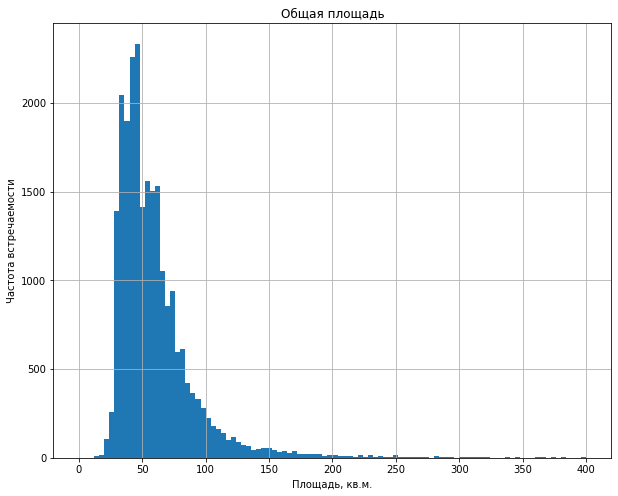

In [36]:
df['total_area'].plot(kind='hist', title='Общая площадь', bins=100, range=(0,400), grid=True, figsize=(10, 8)) #улучшение гистограммы
plt.xlabel('Площадь, кв.м.')
plt.ylabel('Частота встречаемости')
plt.show()

Большая часть значений приходится на интервал от 30-35 кв.м. до приблизительно 70. Пик приходится на значения 40-45 кв.м. и смещен влево, что видимо связано с большим количеством аномально высоких значений.

In [37]:
df['last_price'].describe().apply('{0:.2f}'.format) #получаем список характерных значений в столбце

count        23699.00
mean       6541548.77
std       10887013.27
min          12190.00
25%        3400000.00
50%        4650000.00
75%        6800000.00
max      763000000.00
Name: last_price, dtype: object

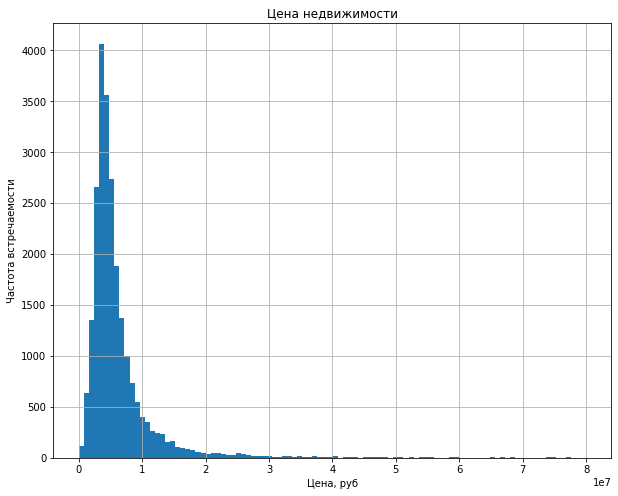

In [38]:
df['last_price'].plot(kind='hist', title='Цена недвижимости', bins=100, range=(0, 80000000), grid=True, figsize=(10, 8)) #построение гистограммы
plt.ylabel('Частота встречаемости')
plt.xlabel('Цена, руб')
plt.show()

Цены разбросаны ещё сильнее, чем площади квартир, на это нам намекает стандартное отклонение более 10 млн. Минимальное цена в 12 000 руб. явный выброс, как и максимальное значение в 763 млн (если речь конечно идет не о недвижимосте в Москве). Пик гистограммы приходится на стоимость 4-5 млн, при этом есть варианты стоимостью 50 и более млн, что для цены на квартиру в крупном мегаполисе вполне допустимо.

In [39]:
df['rooms'].describe() #получаем список характерных значений в столбце

count   23,699.00
mean         2.07
std          1.08
min          0.00
25%          1.00
50%          2.00
75%          3.00
max         19.00
Name: rooms, dtype: float64

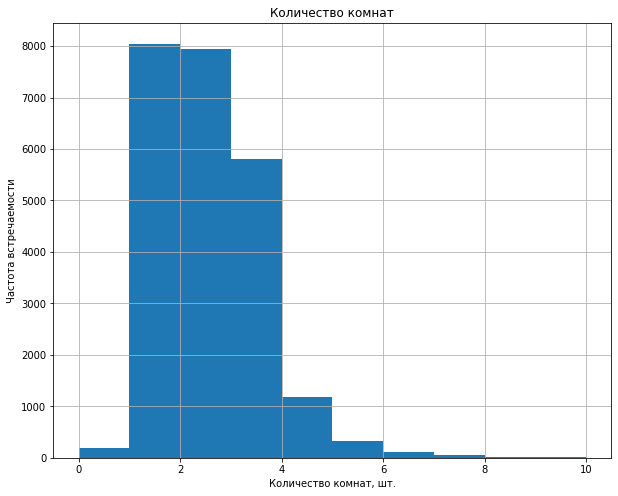

In [40]:
df['rooms'].plot(kind='hist', title='Количество комнат', range=(0, 10), grid=True, figsize=(10, 8)) #построение гистограммы
plt.xlabel('Количество комнат, шт.')
plt.ylabel('Частота встречаемости')
plt.show()

Большая часть объектов представлена 1-3 комнатными квартирами, что вполне ожидаемо. Отсутствие комнат вероятно является аномалией. Наличие 10-19 комнат в квартире, конечно же большая редкость, однако теоретически это вполне возможно.

In [41]:
df['ceiling_height'].describe() #получаем список характерных значений в столбце

count   23,699.00
mean         2.72
std          0.99
min          1.00
25%          2.60
50%          2.65
75%          2.70
max        100.00
Name: ceiling_height, dtype: float64

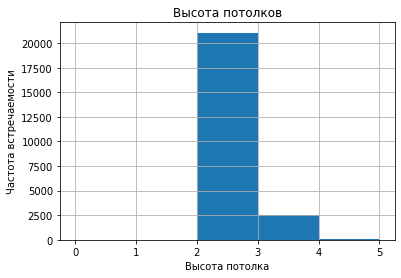

In [42]:
df['ceiling_height'].plot(kind='hist', title='Высота потолков', bins=5, range=(0, 5), grid=True) #построение гистограммы
plt.xlabel('Высота потолка')
plt.ylabel('Частота встречаемости')
plt.show()

В столбце 'ceiling_height', мы ранее заменили пропущенные значения на медиану, поэтому распределение здесь относительно нормальное, хотя явные выбросы в виде 1- и 100-метровых потолков присутствуют. 

**Промежуточный вывод**

Нами изучены характерные параметры данных в столбцах содержащих площадь, цену, число комнат и высоту потолков с помощью метода describe(), и для каждого ряда данных построена гистограмма. Распределение значений ни в одном из столбцов, пожалуй за исключением 'ceiling_height', нельзя назвать нормальным, ввиду наличия выбросов.

### Изучение время продажи квартиры

In [43]:
df['days_exposition'].describe() #получение списка характерных значений в столбце

count   20,518.00
mean       180.89
std        219.73
min          1.00
25%         45.00
50%         95.00
75%        232.00
max      1,580.00
Name: days_exposition, dtype: float64

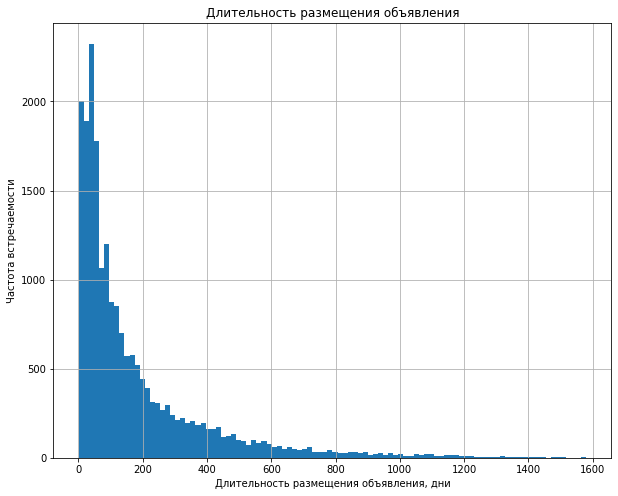

In [44]:
df['days_exposition'].plot(kind='hist', bins=100, title='Длительность размещения объявления', grid=True, figsize=(10, 8)) #построение гистограммы
plt.xlabel('Длительность размещения объявления, дни')
plt.ylabel('Частота встречаемости')
plt.show()

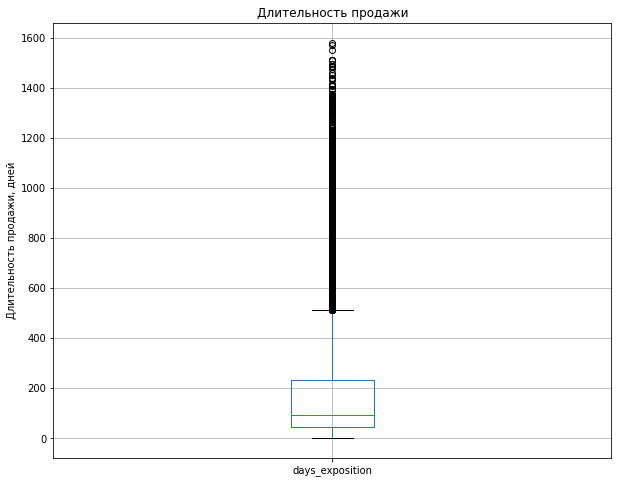

In [45]:
df['days_exposition'].plot(kind='box', title='Длительность продажи', grid=True, figsize=(10, 8)) #построение диаграммы "ящик с усами"
plt.ylabel('Длительность продажи, дней')
plt.show()

Среднее время продажи квартиры составляет около 180 дней, при этом медиана практически в два раза меньше - 95 дней. Обычно продажа занимает 50-200 дней. Минимальное время продажи квартиры сотсавляет один день, максимальное - 1580 дней. На гистограмме пик продаж наблюдается до 50 дней, при этом немало продаж сконцентрировано возле нуля. Если продажа заняла менее 45 дней можно считать, что она поизошла быстро, только 25% процентов квартир проданы раньше этого срока, аномально долгой можно считать продажу которая длитьться более 500 дней (исходя из границы верхнего "уса" на диаграмме размаха).

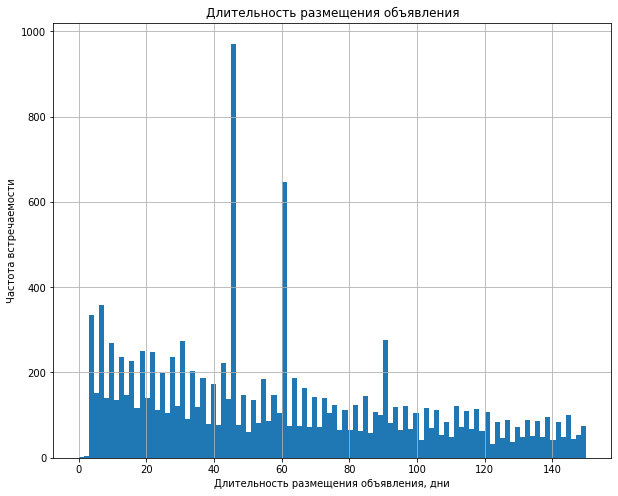

In [46]:
df['days_exposition'].plot(kind='hist', bins=100, range=(0, 150), title='Длительность размещения объявления', grid=True, figsize=(10, 8)) #построение гистограммы
plt.xlabel('Длительность размещения объявления, дни')
plt.ylabel('Частота встречаемости')
plt.show()

В диапазоне от 0 до 150 дней есть три пика: 45, 60 и 90 дней. Логично было бы предположить, что это как-то связано с работой сервиса. Например, сервис предлагает следущие варианты длительности размещения объявлений 45, 60, 90 дней и безлимитное размещение (допустим за ежемесячную плату). Пики в этих значениях объяснялись бы тем, что в эти дни автоматически снимается объявление у тех кто выбрал соответствующий вариант размещения. Но если мы принимаем, что все эти квартиры именно были проданы, то этот вариант может не подойти. Хотя можно сказать, что эти квартиры могли быть проданы до 45, 60 или 90 дней, а пользователь просто не снял объявление о продаже, но так как квартира была уже продана, и объявление о её продаже стало не актуальным, то он не стал далее оплачивать его размещение и оно автоматически снялось по истечение одного из указанных периодов.

Второй вариант - это связано с особенностью работы агенств недвижимости. Допустим есть какие-то точки в которые агенства снижают изначальную стоимость, чтобы увеличить шансы продажи (допустим 30, 50 и 80 день), и после этого шанс продажи возрастает в течении нескольких ближайших дней. 

Также это может быть связано со сроками рассмотрения банками заявки на ипотечное кредитование, но первый вариант мне нравится больше всего.

### Фильтрация редких и выбивающихся значений

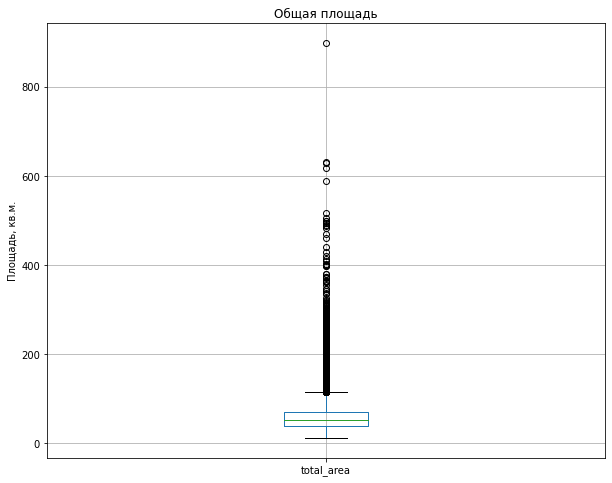

In [47]:
df['total_area'].plot(kind='box', title='Общая площадь', grid=True, figsize=(10, 8)) #построение диаграммы "ящик с усами"
plt.ylabel('Площадь, кв.м.')
plt.show()

Согласно, построенной диаграмме размаха аномальными являются квартиры площадь которых превышает отметку приблизительно в 150 кв.м., но как видно из графика таких вариантов много, и вплоть до значения 300 кв.м., точки их обозначающие, сливаются в сплошную черную линию.

Посмотрим какова доля квартир с площадью более 150 кв.м., но менее 300 кв.м., и более 300 кв.м.

In [48]:
print(len(df.query( '300 > total_area > 150')) / len(df)) #доля квартир с площадью более 150 кв.м., но менее 300 кв.м.
len(df.query('total_area > 300')) / len(df) #доля квартир с площадью более 300 кв.м. 

0.021140132495041986


0.0025739482678594034

Квартир с площадью от 150 до 300 кв.м. более 2%, то есть такие квартиры нельзя назвать сверхредкими. Доля квартир с площадью более 300 кв.м. несущественна, уберём их, как редкие большие.

In [49]:
df = df.query('total_area <= 300')

In [50]:
df['last_price'].describe().apply('{0:.2f}'.format) #получаем список характерных значений в столбце

count        23638.00
mean       6306195.18
std        7770378.90
min          12190.00
25%        3400000.00
50%        4620000.00
75%        6750000.00
max      330000000.00
Name: last_price, dtype: object

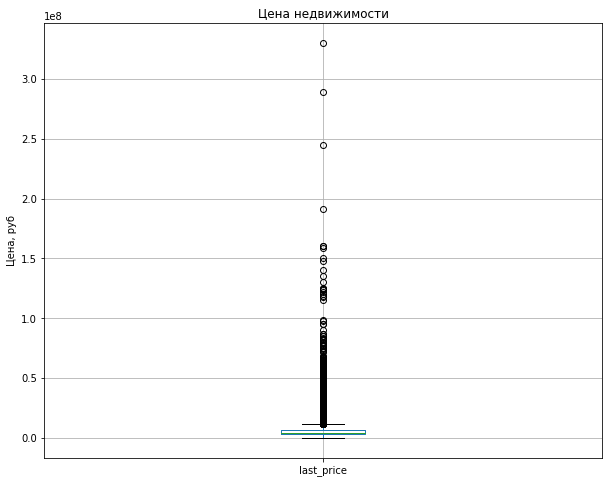

In [51]:
df['last_price'].plot(kind='box', title='Цена недвижимости', grid=True, figsize=(10, 8)) #построение диаграммы "ящик с усами"
plt.ylabel('Цена, руб')
plt.show()

На диаграмме присутствует большое количество аномально высоких значений. Количество выбросов после цены в 50 млн сокращается. Найдем долю квартир со стоимостью более 50 млн.

In [52]:
len(df.query('last_price > 50000000')) / len(df) #доля квартир стоимостью более 50 млн рублей

0.004188171588120822

Доля квартир стоимостью более 50 млн рублей составляет меннее 0,5%, исключим их, как редко встречающиеся значения.

In [53]:
df = df.query('last_price <= 50000000')

Также есть квартиры цена которых относится не категории "редких", а скорее является результатом ошибки при записи (например самая дешёвая жилплощадь стоимостью 12 190 руб.

Чтобы отсечь неправдоподобно дешёвые квартиры, посмотрим сколько квартир стоят менее 500 000 руб.

In [54]:
df.query('last_price < 500000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday_exposition,month_exposition,year_exposition,floor_category,ratio_living_to_total,ratio_kitchen_to_total
5698,7,450000,42.00,2017-07-31,2,2.65,1.00,23.00,1,False,...,0.00,отсутствует в радиусе 3 км,233.00,10714,0,7,2017,первый,0.50,0.10
6859,6,490000,40.00,2017-12-11,1,2.65,5.00,22.34,3,False,...,0.00,отсутствует в радиусе 3 км,43.00,12250,0,12,2017,другой,0.60,0.20
8793,7,12190,109.00,2019-03-20,2,2.75,25.00,32.00,25,False,...,0.00,отсутствует в радиусе 3 км,8.00,111,2,3,2019,последний,0.30,0.40
9581,7,450000,43.40,2018-08-31,2,2.65,5.00,30.30,3,False,...,0.00,отсутствует в радиусе 3 км,96.00,10368,4,8,2018,другой,0.70,0.10
10782,3,490000,29.10,2016-05-05,1,2.50,5.00,17.00,5,False,...,0.00,отсутствует в радиусе 3 км,719.00,16838,3,5,2016,последний,0.60,0.20
14911,5,430000,54.00,2018-06-26,2,2.65,3.00,30.15,3,False,...,0.00,отсутствует в радиусе 3 км,44.00,7962,1,6,2018,последний,0.60,0.20
16032,8,480000,32.00,2019-01-06,1,2.65,2.00,16.00,1,False,...,0.00,отсутствует в радиусе 3 км,83.00,15000,6,1,2019,первый,0.50,0.20
16219,14,450000,38.50,2018-07-11,2,2.65,2.00,21.50,1,False,...,0.00,отсутствует в радиусе 3 км,45.00,11688,2,7,2018,первый,0.60,0.20
16274,18,440000,40.00,2018-07-10,1,2.65,5.00,22.34,1,False,...,0.00,отсутствует в радиусе 3 км,45.00,11000,1,7,2018,первый,0.60,0.20
17456,7,430000,30.40,2019-04-22,1,2.65,2.00,16.00,1,False,...,0.00,отсутствует в радиусе 3 км,NaN,14144,0,4,2019,первый,0.50,0.20


Таких объектов всего 14 и один из них выглядит как явная ошибка (минимальное значение 12190). Такие дешёвые квартиры - редкость, а значит уберем их.

In [55]:
df = df.query('last_price >= 500000')

In [56]:
df['rooms'].describe() #получаем список характерных значений в столбце

count   23,525.00
mean         2.05
std          1.04
min          0.00
25%          1.00
50%          2.00
75%          3.00
max         16.00
Name: rooms, dtype: float64

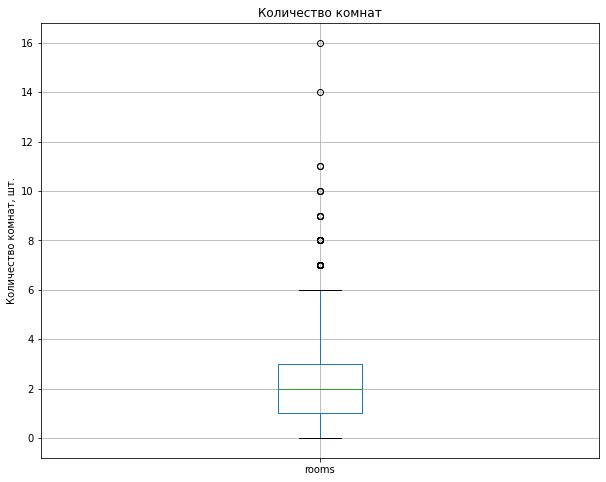

In [57]:
df['rooms'].plot(kind='box', title='Количество комнат', grid=True, figsize=(10, 8)) #построение диаграммы "ящик с усами"
plt.ylabel('Количество комнат, шт.')
plt.show()

Уберем варианты с количеством комнат больше 6.

In [58]:
print(len(df.query('rooms > 6')) / len(df)) #доля квартир с количеством комнат более 6
df = df.query('rooms <= 6')

0.002465462274176408


Есть объявления в которых указан 0 комнат. Выведем этот срез.

In [59]:
df.query('rooms == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday_exposition,month_exposition,year_exposition,floor_category,ratio_living_to_total,ratio_kitchen_to_total
144,1,2450000,27.00,2017-03-30,0,2.65,24.00,15.50,2,False,...,0.00,отсутствует в радиусе 3 км,181.00,90740,3,3,2017,другой,0.60,0.20
349,4,2320000,25.00,2017-09-27,0,2.65,14.00,17.00,1,False,...,0.00,отсутствует в радиусе 3 км,45.00,92800,2,9,2017,первый,0.70,0.20
440,8,2480000,27.11,2018-03-12,0,2.65,17.00,24.75,4,False,...,2.00,982.00,64.00,91479,0,3,2018,другой,0.90,0.20
508,0,3375000,34.40,2017-03-28,0,2.65,26.00,24.30,19,False,...,1.00,593.00,430.00,98110,1,3,2017,другой,0.70,0.20
608,2,1850000,25.00,2019-02-20,0,2.65,10.00,13.96,7,False,...,0.00,отсутствует в радиусе 3 км,29.00,74000,2,2,2019,другой,0.60,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000,26.00,2017-09-01,0,2.65,25.00,18.00,16,False,...,1.00,623.00,14.00,123076,4,9,2017,другой,0.70,0.20
23442,0,2500000,27.70,2017-09-28,0,2.65,24.00,18.00,4,False,...,0.00,отсутствует в радиусе 3 км,4.00,90252,3,9,2017,другой,0.60,0.20
23554,15,3350000,26.00,2018-09-07,0,2.65,19.00,14.52,8,False,...,2.00,112.00,31.00,128846,4,9,2018,другой,0.60,0.20
23592,10,1450000,29.00,2017-11-11,0,2.65,9.00,18.00,8,False,...,0.00,отсутствует в радиусе 3 км,82.00,50000,5,11,2017,другой,0.60,0.20


В датафрейме 196 квартир без комнат. Возможно, это квартиры-студии или квартиры со свободной планировкой.

In [60]:
df.query('(rooms == 0) and (open_plan == True or studio == True)')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday_exposition,month_exposition,year_exposition,floor_category,ratio_living_to_total,ratio_kitchen_to_total
144,1,2450000,27.00,2017-03-30,0,2.65,24.00,15.50,2,False,...,0.00,отсутствует в радиусе 3 км,181.00,90740,3,3,2017,другой,0.60,0.20
349,4,2320000,25.00,2017-09-27,0,2.65,14.00,17.00,1,False,...,0.00,отсутствует в радиусе 3 км,45.00,92800,2,9,2017,первый,0.70,0.20
440,8,2480000,27.11,2018-03-12,0,2.65,17.00,24.75,4,False,...,2.00,982.00,64.00,91479,0,3,2018,другой,0.90,0.20
508,0,3375000,34.40,2017-03-28,0,2.65,26.00,24.30,19,False,...,1.00,593.00,430.00,98110,1,3,2017,другой,0.70,0.20
608,2,1850000,25.00,2019-02-20,0,2.65,10.00,13.96,7,False,...,0.00,отсутствует в радиусе 3 км,29.00,74000,2,2,2019,другой,0.60,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000,26.00,2017-09-01,0,2.65,25.00,18.00,16,False,...,1.00,623.00,14.00,123076,4,9,2017,другой,0.70,0.20
23442,0,2500000,27.70,2017-09-28,0,2.65,24.00,18.00,4,False,...,0.00,отсутствует в радиусе 3 км,4.00,90252,3,9,2017,другой,0.60,0.20
23554,15,3350000,26.00,2018-09-07,0,2.65,19.00,14.52,8,False,...,2.00,112.00,31.00,128846,4,9,2018,другой,0.60,0.20
23592,10,1450000,29.00,2017-11-11,0,2.65,9.00,18.00,8,False,...,0.00,отсутствует в радиусе 3 км,82.00,50000,5,11,2017,другой,0.60,0.20


Это не аномалия, однако эти 0 могут повлиять на результаты корреляционного анализа, поэтому их также стоит отбросить как редкие значения.

In [61]:
print(len(df.query('rooms == 0')) / len(df)) #доля квартир с 0 комнат
df = df.query('rooms != 0')

0.00835215408872033


In [62]:
df['ceiling_height'].describe() #получение списка характерных значений в столбце

count   23,271.00
mean         2.72
std          0.98
min          1.00
25%          2.60
50%          2.65
75%          2.70
max        100.00
Name: ceiling_height, dtype: float64

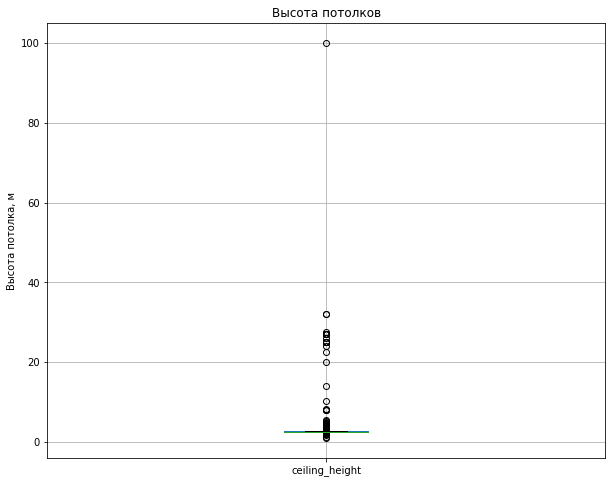

In [63]:
df['ceiling_height'].plot(kind='box', title='Высота потолков', grid=True, figsize=(10, 8)) #построение диаграммы "ящик с усами"
plt.ylabel('Высота потолка, м')
plt.show()

Чтобы что-то разглядеть следует ограничить размер оси y.

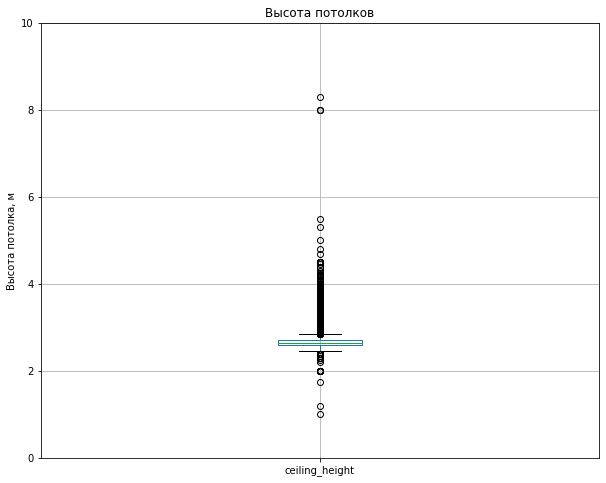

In [64]:
df['ceiling_height'].plot(kind='box', title='Высота потолков', ylim=(0, 10), grid=True, figsize=(10, 8)) #построение диаграммы "ящик с усами"
plt.ylabel('Высота потолка, м')
plt.show()

Судя по графику потолки выше 4 м и ниже 2,5 м встречаются редко, посмотрим насколько:

In [65]:
len(df.query('(ceiling_height > 4) or (ceiling_height < 2.5)')) / len(df) #доля квартир c длительностью продажи более 500 дней

0.005844183748012548

Такие потолки действительно редки, поэтому можем от них избавиться.

In [66]:
df = df.query('(ceiling_height <= 4) and (ceiling_height >= 2.5)') #исключение квартир с потолками выше 4 м и ниже 2,5

In [67]:
df['ceiling_height'].describe()

count   23,135.00
mean         2.69
std          0.20
min          2.50
25%          2.60
50%          2.65
75%          2.70
max          4.00
Name: ceiling_height, dtype: float64

In [68]:
df['days_exposition'].describe() #получение списка характерных значений в столбце

count   20,046.00
mean       180.47
std        219.27
min          1.00
25%         45.00
50%         95.00
75%        231.00
max      1,580.00
Name: days_exposition, dtype: float64

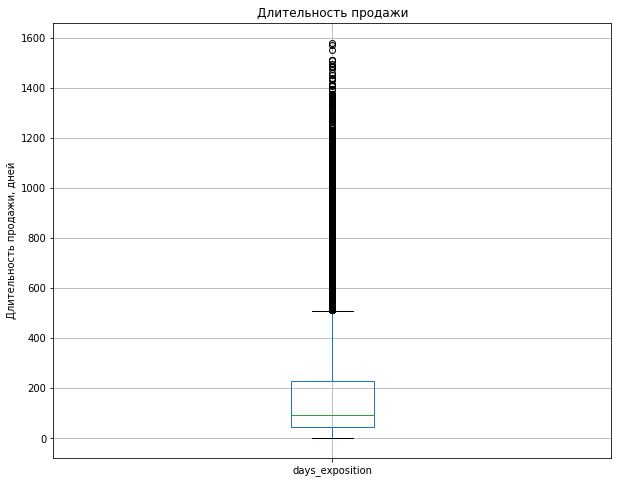

In [69]:
df['days_exposition'].plot(kind='box', title='Длительность продажи', grid=True, figsize=(10, 8)) #построение диаграммы "ящик с усами"
plt.ylabel('Длительность продажи, дней')
plt.show()

Большая часть квартир продается до 500 дней с момента публикации объявления. Большое количество значений лежит выше границы верхнего 1,5*IQR. Доля продаж такой длительности составляет:

In [70]:
len(df.query('days_exposition > 500')) / len(df) #доля квартир c длительностью продажи более 500 дней

0.07335206397233629

Доля таких квартир велика (более 7%), если убрать их все, то это исказит результаты исследования. Судя по графику редкая квартира продается дольше 1200 дней, их доля в датафрейме составляет:

In [71]:
len(df.query('days_exposition > 1200')) / len(df) #доля квартир c длительностью продажи более 1200 дней

0.0038902096390749947

Избавимся от квартир которые продавались дольше 1200 дней, в связи с их редкостью.

In [72]:
df = df[(df['days_exposition'] <= 1200) | (df['days_exposition'].isna())] #удаление квартир с длительностью продажи 
                                                                        #более 1200 дней с сохранением пропусков

Есть и квартиры которые были проданы очень быстро. Посмотрим, как меняется доля квартир продажа которых случилась быстрее 10 дней.

In [73]:
print(len(df.query('days_exposition < 10')) / len(df))
print(len(df.query('days_exposition < 9')) / len(df))
print(len(df.query('days_exposition < 8')) / len(df))
print(len(df.query('days_exposition < 7')) / len(df))
print(len(df.query('days_exposition < 6')) / len(df))
print(len(df.query('days_exposition < 5')) / len(df))
len(df.query('days_exposition < 4')) / len(df)

0.04755912345411152
0.04148405293990019
0.035712735951399434
0.025905836407029724
0.020655239748318507
0.014363202430028206


0.006856151008895639

Квартиры которые были проданы очень быстро (за 5-10 дней), занимают существенную часть датафрейма, а вот квартира проданная в первые 3 дня после публикации объявления - это чрезвычайная редкость. Отсечем квартиры проданные быстрее 4 дней из датафрейма.

In [74]:
df = df[(df['days_exposition'] >= 4) | (df['days_exposition'].isna())] #удаление квартир с длительностью продажи 
                                                                        #менее 4 дней с сохранением пропусков

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22887 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            22887 non-null  int64         
 1   last_price              22887 non-null  int64         
 2   total_area              22887 non-null  float64       
 3   first_day_exposition    22887 non-null  datetime64[ns]
 4   rooms                   22887 non-null  int64         
 5   ceiling_height          22887 non-null  float64       
 6   floors_total            22805 non-null  float64       
 7   living_area             22887 non-null  float64       
 8   floor                   22887 non-null  int64         
 9   is_apartment            22887 non-null  bool          
 10  studio                  22887 non-null  bool          
 11  open_plan               22887 non-null  bool          
 12  kitchen_area            22887 non-null  float6

В результате наших манипуляций датафрейм "похудел" на 812 записей. Что составляет:

In [76]:
print(f'Доля удаленных данных: {(812/23699):.2%}')
print(f'Доля оставшихся данных: {(22887/23699):.2%}')

Доля удаленных данных: 3.43%
Доля оставшихся данных: 96.57%


**Промежуточный вывод**

Используя диаграмму размаха и срезы датафрейма по условию мы исключили часть строк из датафрейма. Некоторые из этих данных были аномальными, например квартира за 12190 рублей или 100-метровые потолки. Другие крайне низкие или крайне высокие исключенные значения были редкими и они были удалены для нивелирования их влияния при оценке зависимости стоимости квартиры от различных факторов.

### Оценка влияния различных факторов на стоимость квартиры

Для изучения зависимости цены квартиры от площади, числа комнат и удаленности от центра, рассчитаем коэффициенты корреляции и построим скатерограммы. Чтобы не делать расчеты отдельно для каждой пары признаков, можно воспользоваться матрицей рассеяния. 

In [77]:
df_for_scaterr = df[['last_price', 'total_area', 'rooms', 'city_centers_nearest']] #получение датафрейма с необходимыми столбцами

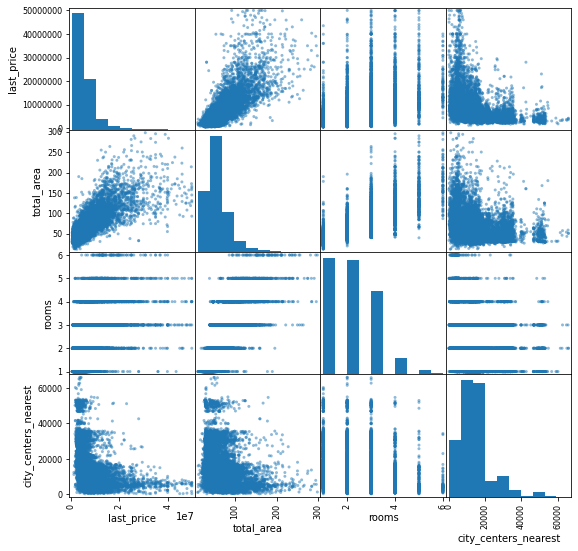

In [78]:
pd.plotting.scatter_matrix(df_for_scaterr, figsize=(9, 9)) #построение матрицы рассеяния
plt.show()

Глядя на полученные диаграммы рассеяния, можно сделать вывод, что зависимость прослеживается между ценой квартиры и общей площадью. 

Рассчитаем коэффициенты корреляции.

In [79]:
df_for_scaterr.corr()['last_price'] #рассчет коэффициента корреляции

last_price              1.00
total_area              0.77
rooms                   0.48
city_centers_nearest   -0.33
Name: last_price, dtype: float64

Рассчитанные коэффициенты корреляции подтверждают нашу предыдущую догадку, между ценой и площадью квартиры есть сильная прямая связь, то есть с ростом площади квартиры, растет и её цена. Также можно отметить прямую связь средней силы между количеством комнат и ценой. Коэффициент корреляции между ценой и расстоянием до центра говорит о слабой обратной связи между данными параметрами, т.е. с приближением к центру цена квартиры незначительно растёт. 

Чтобы изучить зависимость стоимости квартиры от того на каком этаже она находится и даты размещения объявления, воспользуемся сводными таблицами. С помощью сводных таблиц сравним среднюю цену квартиры в зависимости от этажа расположения и даты размещения объявления.

In [80]:
df.pivot_table(index='floor_category', values='last_price') #построение сводной таблицы для этажей

,last_price
floor_category,
другой,"6,203,650.16"
первый,"4,602,961.95"
последний,"5,736,834.28"


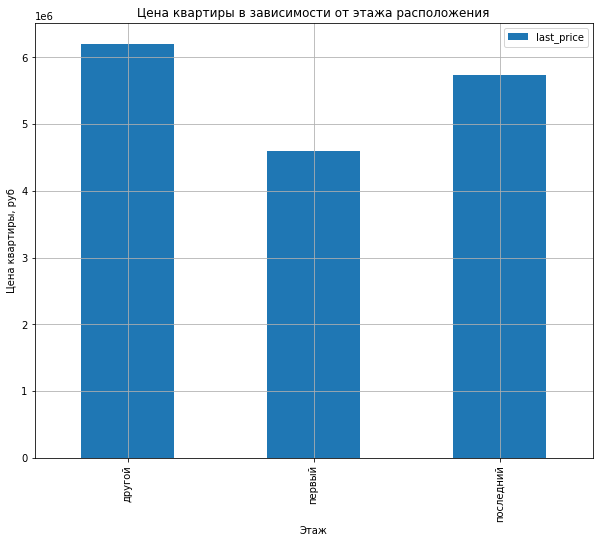

In [81]:
df.pivot_table(index='floor_category', values='last_price').plot(
    kind='bar', title='Цена квартиры в зависимости от этажа расположения', grid=True, figsize=(10,8))
plt.ylabel('Цена квартиры, руб')
plt.xlabel('Этаж')
plt.show()

Самая высокая средняя цена у квартир расположенных не на первом и не на последнем этаже. Самая низкая средняя цена у квартир на первом этаже.

In [82]:
df.pivot_table(index='weekday_exposition', values='last_price') #построение сводной таблицы для дней недели

,last_price
weekday_exposition,
0,"5,976,013.78"
1,"5,956,176.57"
2,"6,024,203.56"
3,"6,080,952.82"
4,"5,832,844.77"
5,"5,706,970.72"
6,"5,787,132.19"


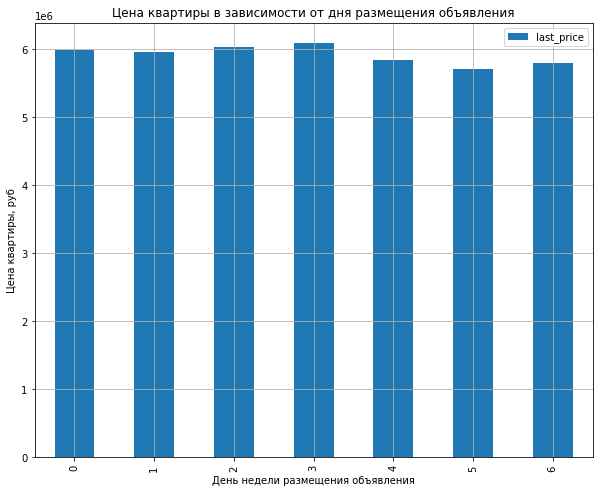

In [83]:
df.pivot_table(index='weekday_exposition', values='last_price').plot(
    kind='bar', title='Цена квартиры в зависимости от дня размещения объявления', grid=True, figsize=(10, 8))
plt.xlabel('День недели размещения объявления')
plt.ylabel('Цена квартиры, руб')
plt.show()

Такой выраженной разницы в средней цене квартиры в зависимости от дня недели размещения объявления не наблюдается. В среднем объявления о несколько более дорогих квартирах размещаются с понедельника по четверг, о чуть более дешёвых с пятницы по воскресенье (может это как-то связано с режимом работы риэлторских агенств), но разница эта не столь велика.

In [84]:
df.pivot_table(index='month_exposition', values='last_price') #построение сводной таблицы для месяцев

,last_price
month_exposition,
1,"6,046,959.47"
2,"6,022,710.42"
3,"5,851,882.69"
4,"5,923,076.62"
5,"5,892,977.42"
6,"5,787,847.04"
7,"5,877,848.52"
8,"5,984,503.69"
9,"5,995,599.27"


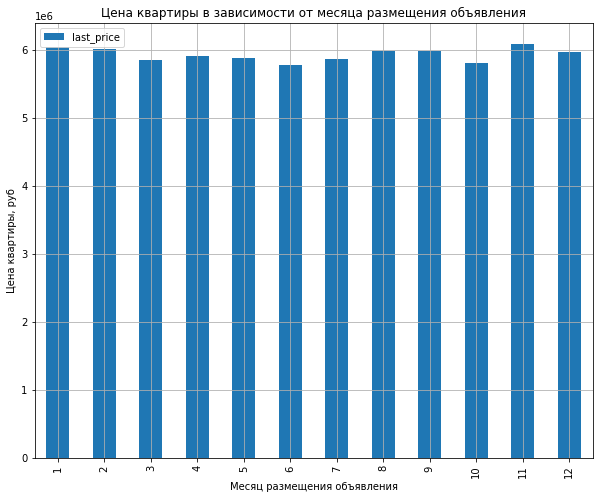

In [85]:
df.pivot_table(index='month_exposition', values='last_price').plot(
    kind='bar', title='Цена квартиры в зависимости от месяца размещения объявления', grid=True, figsize=(10, 8))
plt.xlabel('Месяц размещения объявления')
plt.ylabel('Цена квартиры, руб')
plt.show()

Тоже самое с месяцем размещения объявления, средняя цена в разные месяцы различается не сильно (максимальная разница около 300 тыс. руб.). Можно сказать что в среднем объявления о чуть более дорогих квартирах размещаются с ноября по февраль.

In [86]:
df.pivot_table(index='year_exposition', values='last_price') #построение сводной таблицы годов

,last_price
year_exposition,
2014,"10,299,168.64"
2015,"6,879,228.26"
2016,"6,034,160.57"
2017,"5,844,335.33"
2018,"5,704,021.40"
2019,"6,278,265.89"


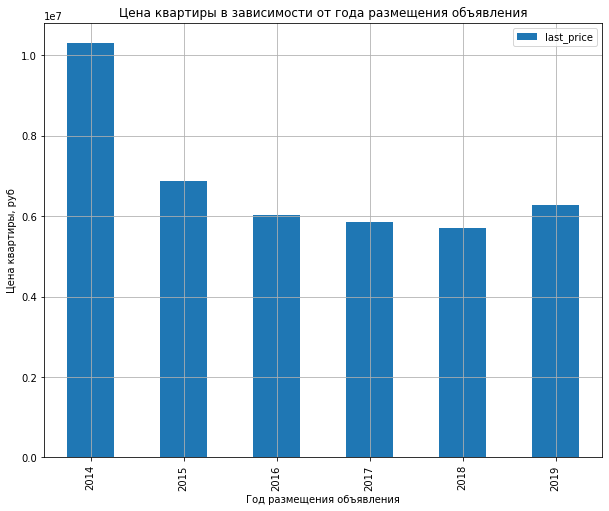

In [87]:
df.pivot_table(index='year_exposition', values='last_price').plot(
    kind='bar', title='Цена квартиры в зависимости от года размещения объявления', grid=True, figsize=(10, 8))
plt.xlabel('Год размещения объявления')
plt.ylabel('Цена квартиры, руб')
plt.show()

Здесь можно наблюдать более выраженную разницу в средней цене квартиры в зависимости от года размещения объявления. В среднем объявления о самых дорогих квартирах размещались в 2014 году (средняя цена более 10 млн рублей). Далее средняя цена размещаемых квартир ежегодно снижалась вплоть до 2019 года, когда произошел рост средней цены квартиры. В среднем самые дешёвые квартиры размещались в 2018 году. Наверное, данная ситуация отражает тогдашние тенденции рынка недвижимости.

**Промежуточный вывод**

Больше всего на стоимость квартиры влияет её площадь (прямая сильная связь), в меньшей степени на цену квартиры влияет количество комнат (прямая связь средней силы), а между ценой и расстоянием от квартиры до центра города установлена слабая обратная связь.

В среднем квартиры которые расположены на последнем этаже, дороже чем квартиры на первых этажах, но и те и другие уступают в средней цене квартирам, расположенным на других этажах.

Разница в средней цене между квартирами объявления о продаже которых размещались в разные дни недели и месяца не значительна. Разница в средней цене в зависимости от года размещения объявления выражена гораздо сильней: наблюдается падения средней цены с 2014 (самые дорогие квартиры) по 2018 (самые дешёвые квартиры) гг почти в 2 раза, и рост средней цены в 2019 году. 

In [88]:
print(st.ttest_ind(df[df['year_exposition'] == 2014]['last_price'].tolist(), df[df['year_exposition'] == 2015]['last_price'].tolist()).pvalue)
print(st.ttest_ind(df[df['month_exposition'] == 11]['last_price'].tolist(), df[df['month_exposition'] == 7]['last_price'].tolist()).pvalue)
print(st.ttest_ind(df[df['weekday_exposition'] == 5]['last_price'].tolist(), df[df['weekday_exposition'] == 3]['last_price'].tolist()).pvalue)
print(st.ttest_ind(df[df['weekday_exposition'] == 6]['last_price'].tolist(), df[df['weekday_exposition'] == 3]['last_price'].tolist()).pvalue)
print(st.ttest_ind(df[df['weekday_exposition'] == 4]['last_price'].tolist(), df[df['weekday_exposition'] == 3]['last_price'].tolist()).pvalue)
st.ttest_ind(df[df['weekday_exposition'] == 0]['last_price'].tolist(), df[df['weekday_exposition'] == 3]['last_price'].tolist()).pvalue

1.343217359179081e-08
0.17059923881408118
0.00637723943267979
0.041884196640573204
0.020439580662319146


0.3590974528744998

### ТОП-10 городов по количеству объявлений

In [89]:
df.pivot_table(index='locality_name', values='price_square_meter', aggfunc=('count', 'mean')).sort_values(
    by='count', ascending=False).head(10) #10 городов с наибольшим количеством объявлений и средняя цена квадратного метра в них.

,count,mean
locality_name,,
Санкт-Петербург,"15,135.00","112,089.21"
посёлок Мурино,490.00,"84,970.12"
посёлок Шушары,433.00,"78,470.54"
Всеволожск,389.00,"68,649.95"
Пушкин,359.00,"103,124.11"
Колпино,332.00,"75,424.42"
посёлок Парголово,316.00,"90,338.54"
Гатчина,303.00,"68,746.53"
деревня Кудрово,282.00,"92,226.45"


Абсолютным лидером по количеству объявлений о продаже жилья является Санкт-Петербург, что вполне ожидаемо. В ближайшем, по количеству объявлений, к Санкт-Петербургу населенном пункте их всего 491, в то время как в Питере больше 15 000. Самая высокая средняя стоимость квадратного метра также наблюдается в Санкт-Петербурге, а самая низкая в Выборге.

### Определение границ центра

In [90]:
df_spb = df.query('locality_name == "Санкт-Петербург"') #получение среза с данными по Санкт-Петербургу

In [91]:
df_spb['km_center_nearest'] = (df_spb['city_centers_nearest'] / 1000).round(0) #добавления столбца с километрами до центра
df_spb['km_center_nearest'].head() #проверка

/tmp/ipykernel_82/3183108856.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spb['km_center_nearest'] = (df_spb['city_centers_nearest'] / 1000).round(0) #добавления столбца с километрами до центра


0   16.00
2   14.00
4    8.00
7   12.00
9   15.00
Name: km_center_nearest, dtype: float64

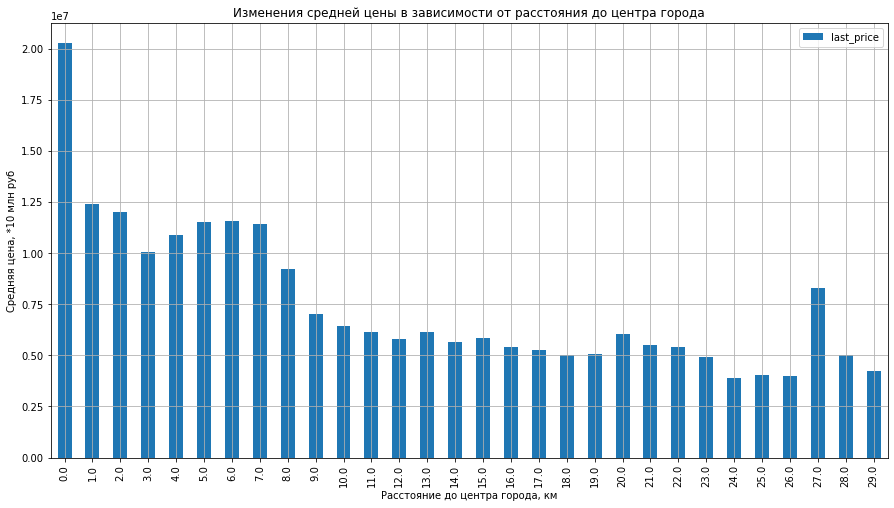

In [92]:
df_spb.pivot_table(index='km_center_nearest', values='last_price').plot(
    kind='bar',title='Изменения средней цены в зависимости от расстояния до центра города', grid=True, figsize=(15, 8)) #построение столбчатой
plt.xlabel('Расстояние до центра города, км')
plt.ylabel('Средняя цена, *10 млн руб')
plt.show()

После 8 км средняя цена заметно падает, поэтому определим центральную зону радиусом 8 км. Всплеск средней цены наблюдается также на 27 км от центра, видимо это какой-то район элитной застройки в отдалении от центра города.

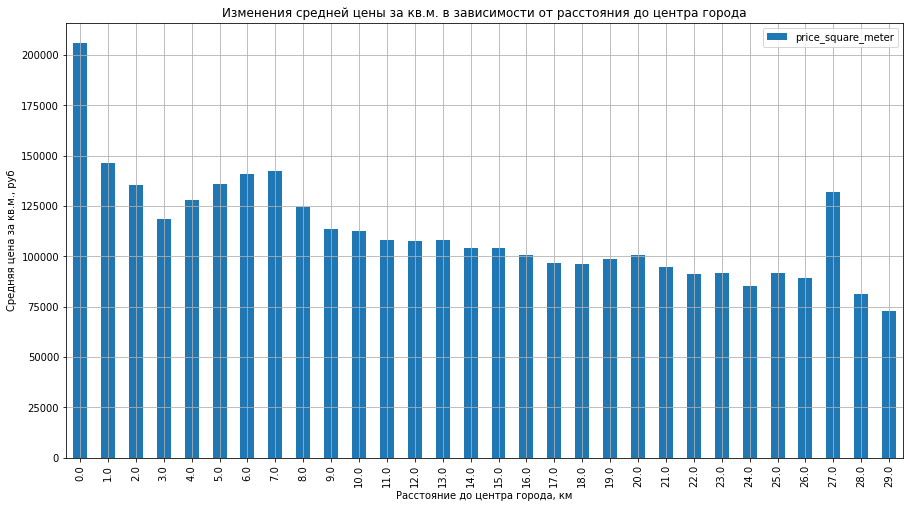

In [93]:
df_spb.pivot_table(index='km_center_nearest', values='price_square_meter').plot(
    kind='bar', title='Изменения средней цены за кв.м. в зависимости от расстояния до центра города', grid=True, figsize=(15, 8)) #построение столбчатой
plt.xlabel('Расстояние до центра города, км')
plt.ylabel('Средняя цена за кв.м., руб')
plt.show()

#### Анализ квартир в центре

In [94]:
df_spb_center = df_spb.query('km_center_nearest < 9') #получение среза датафрейма с квартирами в центре

In [95]:
df_general = df_spb.join(df_spb_center, rsuffix='_cspb')
df_general

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest_cspb,days_exposition_cspb,price_square_meter_cspb,weekday_exposition_cspb,month_exposition_cspb,year_exposition_cspb,floor_category_cspb,ratio_living_to_total_cspb,ratio_kitchen_to_total_cspb,km_center_nearest_cspb
0,20,13000000,108.00,2019-03-07,3,2.70,16.00,51.00,8,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10,5196000,56.00,2015-08-20,2,2.65,5.00,34.30,4,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,10000000,100.00,2018-06-19,2,3.03,14.00,32.00,13,False,...,48.00,121.00,"100,000.00",1.00,6.00,"2,018.00",другой,0.30,0.40,8.00
7,5,7915000,71.60,2019-04-18,2,2.65,24.00,39.98,22,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,18,5400000,61.00,2017-02-26,3,2.50,9.00,43.60,7,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3550000,35.30,2018-02-28,1,2.86,15.00,16.30,4,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23690,3,5500000,52.00,2018-07-19,2,2.65,5.00,31.00,2,False,...,отсутствует в радиусе 3 км,15.00,"105,769.00",3.00,7.00,"2,018.00",другой,0.60,0.10,6.00
23691,11,9470000,72.90,2016-10-13,2,2.75,25.00,40.30,7,False,...,806.00,519.00,"129,903.00",3.00,10.00,"2,016.00",другой,0.60,0.10,4.00
23694,9,9700000,133.81,2017-03-21,3,3.70,5.00,73.30,3,False,...,381.00,NaN,"72,490.00",1.00,3.00,"2,017.00",другой,0.50,0.10,4.00


Для изучения основных параметров воспользуемся методом describe(), а также построем гистограмму для каждого параметра. 

count   3,807.00
mean       82.28
std        39.48
min        12.00
25%        54.00
50%        74.00
75%       100.00
max       297.50
Name: total_area, dtype: float64


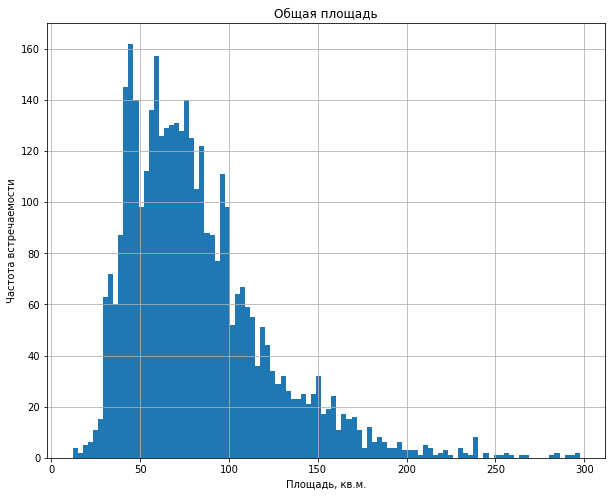

In [96]:
print(df_spb_center['total_area'].describe()) #получение характерных значений для столбца
df_spb_center['total_area'].plot(kind='hist', title='Общая площадь', bins=100, grid=True, figsize=(10, 8)) #построение гистограммы
plt.xlabel('Площадь, кв.м.')
plt.ylabel('Частота встречаемости')
plt.show()

Площадь квартир, продаваемых в центре варьируется от 12 до 297,5 кв.м. Средняя площадь (82,4 кв.м.) несколько выше медианы (74,2 кв.м.). Квартиры с площадью более 200 кв.м. встречаются редко.

count        3,807.00
mean    11,054,446.02
std      7,625,989.54
min      1,686,000.00
25%      6,344,000.00
50%      8,650,000.00
75%     12,900,000.00
max     50,000,000.00
Name: last_price, dtype: float64


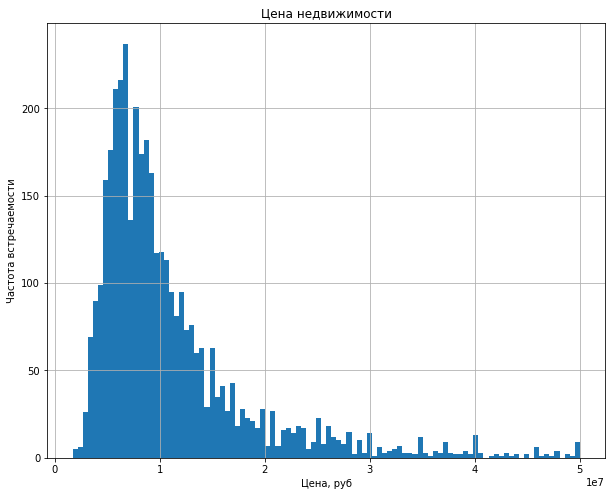

In [97]:
print(df_spb_center['last_price'].describe()) #получение характерных значений для столбца
df_spb_center['last_price'].plot(kind='hist', title='Цена недвижимости', bins=100, grid=True, figsize=(10, 8)) #построение гистограммы
plt.ylabel('Частота встречаемости')
plt.xlabel('Цена, руб')
plt.show()

Разброс цен на квартиры в центре, как и в целом в датафрейме довольно высок, на что указывает, как сам интервал значений от 1,686 млн до 50 млн, так и высокое значение стандартного отклонения. Средняя цена сушщественно выше медианы.

count   3,807.00
mean        2.62
std         1.15
min         1.00
25%         2.00
50%         3.00
75%         3.00
max         6.00
Name: rooms, dtype: float64


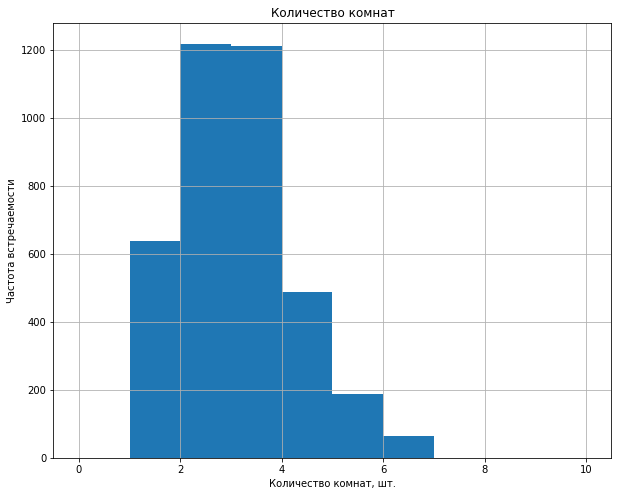

In [98]:
print(df_spb_center['rooms'].describe()) #получение характерных значений для столбца
df_spb_center['rooms'].plot(kind='hist', title='Количество комнат', range=(0, 10), grid=True, figsize=(10, 8)) #построение гистограммы
plt.xlabel('Количество комнат, шт.')
plt.ylabel('Частота встречаемости')
plt.show()

Большая часть продаваемых в центре квартир 2-3х комнатные.

count   3,807.00
mean        2.89
std         0.32
min         2.50
25%         2.65
50%         2.75
75%         3.10
max         4.00
Name: ceiling_height, dtype: float64


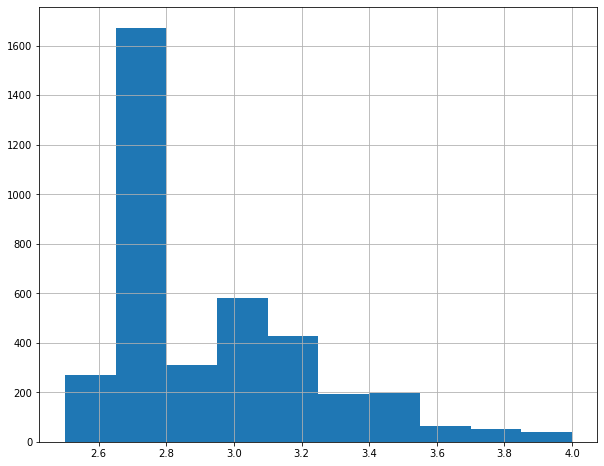

In [99]:
print(df_spb_center['ceiling_height'].describe()) #получение характерных значений для столбца
df_spb_center['ceiling_height'].hist(bins=10, figsize=(10, 8)) #построение гистограммы
plt.show()

Судя по гистограмме преобладают потолки высотой 2,7 и 3 м.

Для изучения влияния различных факторов на стоимость квартиры в центре Санкт-Петербурга построим матрицу рассеяния, расчитаем коэффициенты корреляции, построим сводные таблицы.

In [100]:
df_spb_center_for_scaterr = df_spb_center[['last_price', 'total_area', 'rooms', 'city_centers_nearest']] #получение датафрейма с необходимыми столбцами

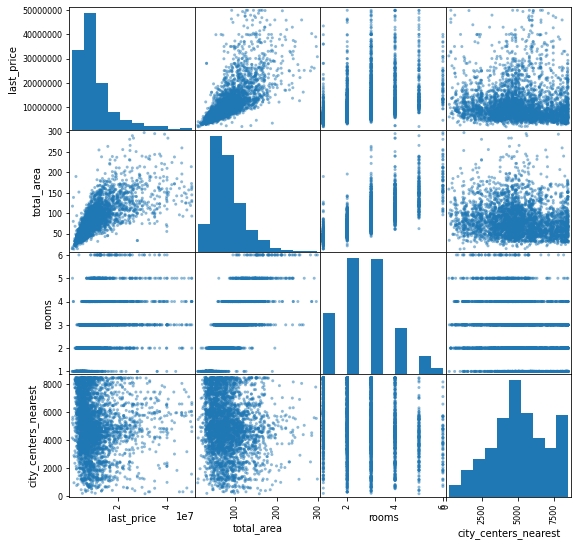

In [101]:
pd.plotting.scatter_matrix(df_spb_center_for_scaterr, figsize=(9, 9)) #построение матрицы рассеяния
plt.show()

Также как и в общей выборки на скатеррограммах видна явная зависимость цены от площади квартиры. Теперь рассчитаем коэффициенты корреляции:

In [102]:
df_spb_center_for_scaterr.corr()['last_price'] #рассчет коэффициента корреляции

last_price              1.00
total_area              0.72
rooms                   0.43
city_centers_nearest   -0.08
Name: last_price, dtype: float64

Цена квартир в центре города также как и в целом в датафрейме зависит от площади и количества комнат, сильная и средняя прямая связь соответственно. А вот от расстояния до центра цена теперь вообще не зависит, что логично, ведь мы и так выделии квартиры в центре города.

In [103]:
df_general.pivot_table(index='floor_category', values=('last_price', 'last_price_cspb')) #построение сводной таблицы для этажей

,last_price,last_price_cspb
floor_category,,
другой,"7,280,619.91","11,544,067.38"
первый,"5,831,749.62","7,913,275.38"
последний,"7,556,228.64","10,961,844.64"


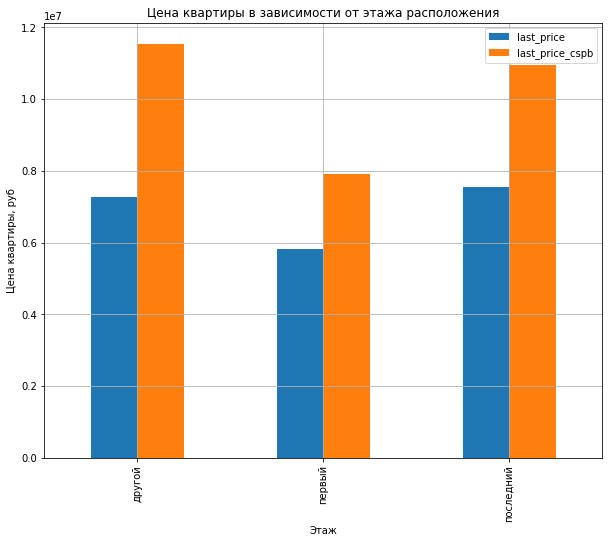

In [104]:
df_general.pivot_table(index='floor_category', values=('last_price', 'last_price_cspb')).plot(
    kind='bar', title='Цена квартиры в зависимости от этажа расположения', grid=True, figsize=(10,8))
plt.ylabel('Цена квартиры, руб')
plt.xlabel('Этаж')
plt.show()

Средняя цена квартир в центре Санкт-Петербурга также ведет себя в зависимости от этажа на котором находится квартира, как и в общей базе. Самые дорогие квартиры находятся где-то между первым и последним этажём, а самые дешёвые на первом. 

In [105]:
df_general.pivot_table(index='weekday_exposition', values=('last_price', 'last_price_cspb')) #построение сводной таблицы для дней недели

,last_price,last_price_cspb
weekday_exposition,,
0,"7,241,101.85","11,535,296.90"
1,"7,089,133.10","10,919,227.74"
2,"7,211,318.49","11,208,525.63"
3,"7,414,055.98","11,180,658.81"
4,"6,974,623.51","10,582,837.03"
5,"7,004,623.09","10,395,440.15"
6,"7,072,928.92","11,502,757.71"


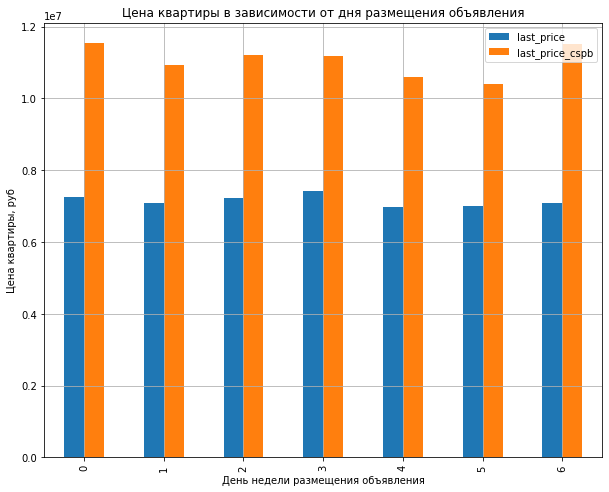

In [106]:
df_general.pivot_table(index='weekday_exposition', values=('last_price', 'last_price_cspb')).plot(
    kind='bar', title='Цена квартиры в зависимости от дня размещения объявления', grid=True, figsize=(10, 8))
plt.xlabel('День недели размещения объявления')
plt.ylabel('Цена квартиры, руб')
plt.show()

Средняя цена квартир в центре Санкт-Петербурга, конечно же выше. Изменение средней цены по дням недели, в целом сходно с таковым в общем датафрейме. С понедельника по четверг размещены объявления с самой дорогой средней ценой, пятничные и субботние объявления отличаются более низкой средней ценой. В отличие от общего датафрейма в центре Санкт-Петербурга средняя цена "воскресных" квартир ближе всего к максимальной. 

In [107]:
df_general.pivot_table(index='month_exposition', values=('last_price', 'last_price_cspb')) #построение сводной таблицы для месяцев

,last_price,last_price_cspb
month_exposition,,
1,"7,536,326.91","11,639,268.05"
2,"7,312,484.24","11,768,887.19"
3,"7,128,033.57","11,012,003.09"
4,"7,051,258.94","10,713,015.93"
5,"7,094,064.97","10,684,391.04"
6,"7,081,211.64","11,322,239.71"
7,"6,963,164.21","10,752,908.54"
8,"7,117,123.08","11,279,492.24"
9,"7,213,803.30","10,593,150.46"


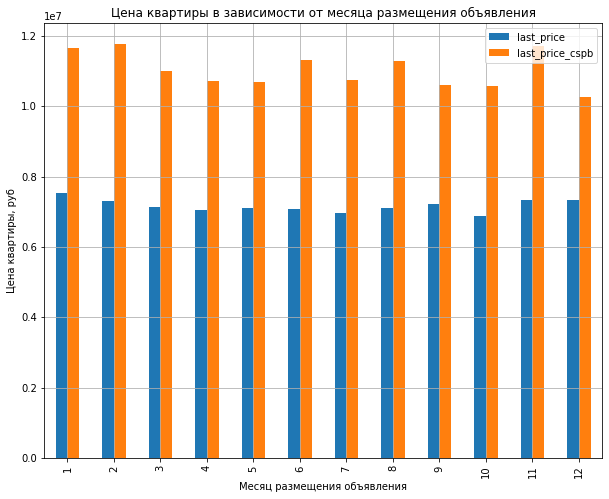

In [108]:
df_general.pivot_table(index='month_exposition', values=('last_price', 'last_price_cspb')).plot(
    kind='bar', title='Цена квартиры в зависимости от месяца размещения объявления', grid=True, figsize=(10, 8))
plt.xlabel('Месяц размещения объявления')
plt.ylabel('Цена квартиры, руб')
plt.show()

Визуально различия в средней цене в зависимости от месяца размещения объявления о продаже квартиры в центре Санкт-Петербурга, гораздо более выражены чем аналогичные различия в общем датафреймеб но в целом распределение средней цены по месяцам похоже. Самые дорогие январе-феврале и ноябре, однако в центре Петербурга наблюдается "просадка" средней цены в декабре, чего нет в общем датафрейме. 

In [109]:
df_general.pivot_table(index='year_exposition', values=('last_price', 'last_price_cspb')) #построение сводной таблицы для годов

,last_price,last_price_cspb
year_exposition,,
2014,"12,085,713.43","16,936,451.92"
2015,"8,085,963.25","11,470,186.00"
2016,"7,261,226.50","11,492,515.57"
2017,"6,985,732.94","10,842,027.63"
2018,"6,984,834.16","10,656,486.53"
2019,"7,479,535.67","11,668,141.62"


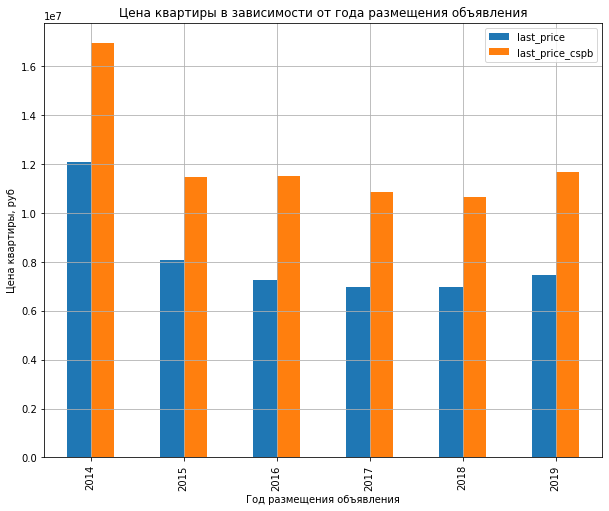

In [110]:
df_general.pivot_table(index='year_exposition', values=('last_price', 'last_price_cspb')).plot(
    kind='bar', title='Цена квартиры в зависимости от года размещения объявления', grid=True, figsize=(10, 8))
plt.xlabel('Год размещения объявления')
plt.ylabel('Цена квартиры, руб')
plt.show()

Средняя цена продаваемых квартир в центре Петербурга, также как и в целом по базе снижалась с 2014 по 2018 год и выросла в 2019 году. Но для квартир в центре цена менялась менее значительно, в 2016 году наблюдался даже незначительный рост средней цены по сравнению с 2015, чего не отмечалась, при аналогичном анализе по базе в целом. Наверное квартиры в центре города менее подвержены общим колебаниям цены на рынке недвижимости.

In [111]:
print(st.ttest_ind(df_spb_center[df_spb_center['year_exposition'] == 2014]['last_price'].tolist(), df_spb_center[df_spb_center['year_exposition'] == 2019]['last_price'].tolist()).pvalue)
print(st.ttest_ind(df_spb_center[df_spb_center['month_exposition'] == 2]['last_price'].tolist(), df_spb_center[df_spb_center['month_exposition'] == 9]['last_price'].tolist()).pvalue)
st.ttest_ind(df[df['weekday_exposition'] == 0]['last_price'].tolist(), df[df['weekday_exposition'] == 5]['last_price'].tolist()).pvalue

0.0020957199532162995
0.03775049177081248


0.05089999408765454

Оценка статистической значимости различий показала в средней цене показала, что также как и в общем датафрейме, она достоверно различается по годам размещения объявления. И обратная ситуация наблюдается с месяцами и днями недели, так для квартир продаваемых в центре Санкт-Петербурга характерна значимая разница в средней цене в зависимости от месяца размещения объявления и её отсутствие в зависимомти от дня недели, а для датафрейма в целом была харакьерна обратная картина.

## Общий вывод

В ходе первого этапа предобработки данных были заменены пропуски в столбцах, где для них нашлась логичная замена, например пропуски в столбце с балконами были заменены на 0. В других столбцах для замены использовалась медиана или расчетные данные. Так пропуски в столбце с высотой потолков были заменены на медиану, учитывая небольшой разброс данных, а пропуски в столбцах с жилой площадью и площадью кухни заменены среднями значениями доли от общей площади в зависимости от количества комнат в квартире. Пропуски были оставлены в столбцах, где их доля незначительна (менее 1%), где для них было проблематично найти замену, либо для удобства дальнейшей работы с данными в столбце. Также было выявлено, отсутствие картографических данных у большого количества объектов недвижимости в датафрейме, о чем следует сообщить заинтересованным лицам.

По результатам следующего этапа предобработки из датафрейма были исключены аномальные значения и выбросы, их доля составила 3,43%. Так как при удалении выбросов исключались крайние аномально высокие или низкие значения, то это могло оказать влияние на дальнейший анализ зависимости цены от различных факторов, так как их присутствие могло смещать значение коэффициента корреляции в ту или иную сторону, но возможно это влияние и не было бы столь выраженным.

При оценки зависимости средней цены квартиры от различных факторов выявлено следущее:
- наличие сильной прямой связи с площадью квартиры как в центральной так и в общей зоне, коэффициент корреляции 0,72 и 0,77 соответственно;
- наличие прямой связи средней силы с количеством комнат как в центральной так и в общей зоне, коэффициент корреляции 0,43 и 0,48 соответственно;
- наличие слабой обратной связи с расстоянием до центра города для общей зоны и отсутствием связи с данным фактором в центральной зоне, коэффициент корреляции -0,33 и -0,08 соответственно;
- средняя цена квартиры в центральной зоне существенно выше цены квартиры в общей зоне;
- квартиры с наибольшей средней ценой распологаются между первым и последним этажём здания, а самые в среднем дешёвые на первом этаже, как в центральной так и в общей зоне;
- как в центральной так и общей зоне наивысшая средняя цена на квартиры наблюдалась в 2014 году, и она была существенно выше средней цены в остальные годы.
- для квартир в общей зоне средняя цена значимо различалась в зависимости от дня недели размещения объявления, в то время как существенной ра